In [ ]:
# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
im = imageio.imread('chest-220.dcm')
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

In [ ]:
# Draw the image with greater contrast
plt.imshow(im, vmin=-200, vmax=200, cmap='gray')
plt.axis('off')
# Render the image
plt.show()

N-Dimensional Images

In [ ]:
'''In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.'''
# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3])
print('Volume dimensions:', vol.shape)

In [ ]:
'''Using volread() to load image volumes can be faster and more reliable than loading them in image-by-image. It also preserves image metadata where possible.'''
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

In [ ]:
'''Field of view
The amount of physical space covered by an image is its field of view, which is calculated from two properties:
Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).'''
n0, n1, n2 = vol.shape
d0, d1, d2 = vol.meta['sampling']
print(n0 * d0, n1 * d1, n2 * d2)

In [ ]:
# Import PyPlot
import matplotlib.pyplot as plt
# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)
# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [ ]:
'''When selecting frames, any trailing : symbols are implicitly selected. For example, vol[5] is the same as vol[5,:,:]. We will follow this simpler convention moving forward.'''
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii * 40,:,:]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

In [ ]:
# Environment Setup
from requests import get
from io import BytesIO
from zipfile import ZipFile

url1 = 'https://assets.datacamp.com/production/repositories/2085/datasets/8a007b3d94cc45c452d2c6e2bf96228b41827253/tcia-chest-ct-vol.zip'
url2 = 'https://assets.datacamp.com/production/repositories/2085/datasets/f44726fefae841afd24ddf83c58f34722212e67a/tcia-chest-ct-sample.zip'
for url in [url1, url2]:
    bfile = BytesIO(get(url).content)
    with ZipFile(bfile, "r") as z:
        z.extractall()

# Exercise Setup
import imageio
from numpy import load
import matplotlib.pyplot as plt

im = imageio.imread('chest-220.dcm')
vol = load('tcia-chest-ct.npz')['arr_0']
# vol = (vol / 255) * 4071 - 1000
vol = imageio.core.Image(vol, meta=im.meta)
vol.meta['sampling'] = (3.269999999999996, 0.976562, 0.976562)
vol.meta['shape'] = (vol.shape[0], 512, 512)
del im
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d1 / d2

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=2)

In [ ]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)

plt.show()

Mask and Filters - image intensity, mask, filter, smoothing

In [ ]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Load the hand radiograph
im = imageio.imread('hand-xray.jpg')
print('Data type:', np.dtype(np.uint8))
print('Min. value:', np.min(im))
print('Max value:', np.max(im))

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()
format_and_render_plot()

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()

MASK- applying mask can help to restrict the application of histogram to important areas and avoid other areas.

C:\Users\TheEarthG\AppData\Local\Temp\ipykernel_23220\3823169510.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread(url)


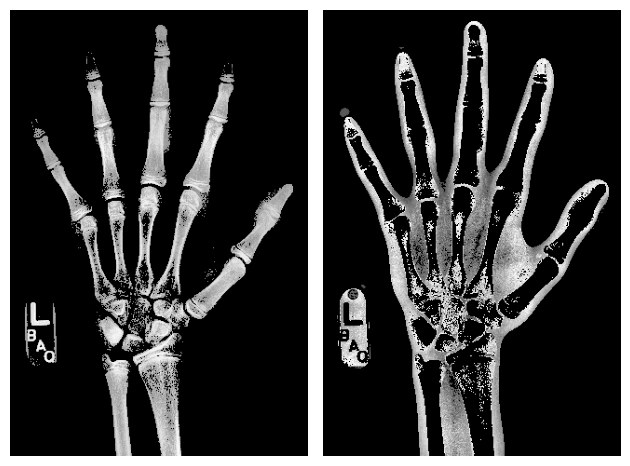

In [1]:
from imageio import imread
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

url = 'https://assets.datacamp.com/production/repositories/2085/datasets/6a360f01d8b52d7ad4db7751fc43a4bbd841d9d9/hand-bg.png'
im = imread(url)

plt.rcParams['image.cmap'] = 'gray'

def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')    
    plt.tight_layout()
    plt.show()
# Create skin and bone masks
mask_bone = np.where(im >= 145, im, 0)
mask_skin = np.where((im >= 45) & (im < 145), im, 0)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_skin)
format_and_render_plot()

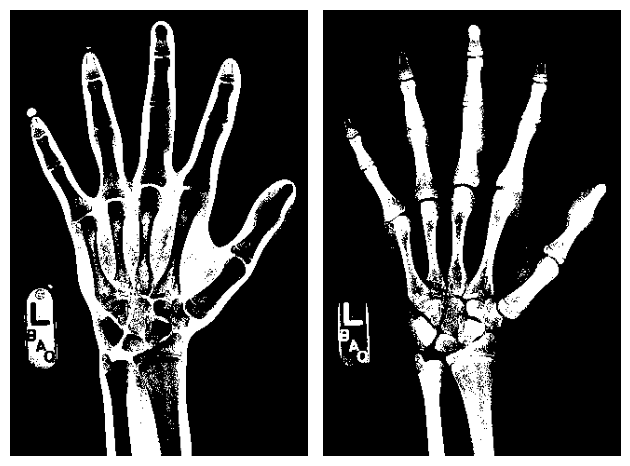

In [2]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot()

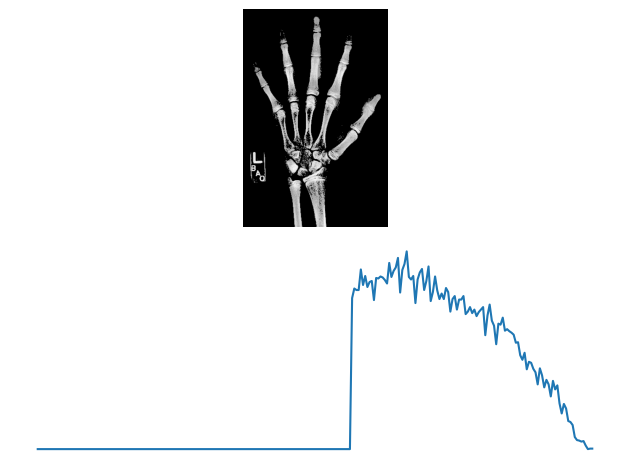

In [3]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, 1, 255, 255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone)
axes[1].plot(hist)
format_and_render_plot()

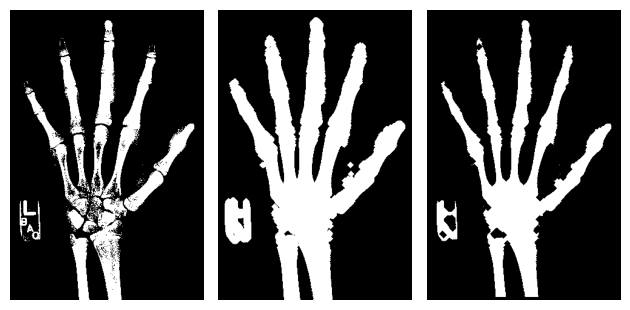

In [4]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
format_and_render_plot()

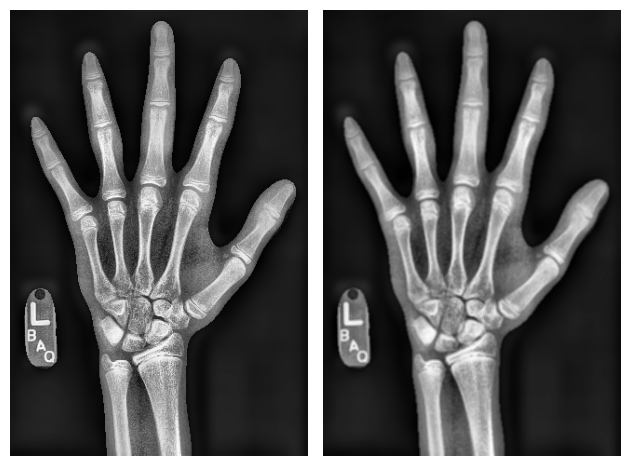

In [5]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
format_and_render_plot()

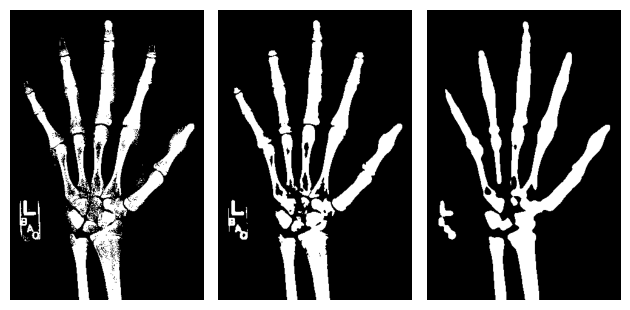

In [6]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1 >= 145)
axes[2].imshow(im_s3 >= 145)
format_and_render_plot()

Feature Detection : Detecting edges

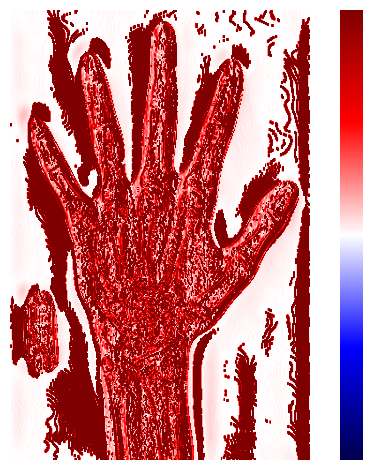

In [7]:
# Set weights to detect vertical edges
weights = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges,cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()

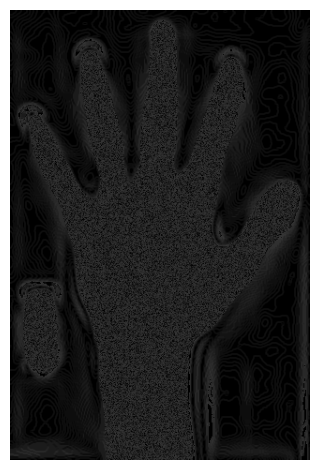

In [8]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, vmax=75, cmap='gray')
format_and_render_plot()